# 3) Combining Encounter Data with Detention Data

In an earlier [blog post]() I wrote:

> President Trump took office in January 2025. At that time there were about 39k people detained by ICE and CBP. Six months later that number is about 58k. That’s a 57% increase in six months, and is (just barely) the highest number in the dataset.    
> 
> Equally interesting is the agency-level data: since Trump took office ICE detentions are sharply up, but CBP detentions are down. I am not sure why CBP detentions are down.

A statistician with the Department of Homeland Security told me that the decrease in CBP arrests was probably due to a decrease in the number of people attempting to cross the southwest land border. Let's see if those numbers truly go up and down together.


In [12]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.io as pio
import cbp_functions as cbp
from IPython.display import display

# Don't want to duplicate the variable here, and this seems to be the prefered way to import something
# when you're not dealing with a "proper" package (which notebooks are not)
import sys

sys.path.append("..")
import backend as be

# Allows plotly plots to render interactively locally, but as static images when viewed in github.
# Without this the plotly images simply do not render in github.
pio.renderers.default = "vscode+png"

# Read in data and rename columns for convenience.
df_encounters = cbp.get_monthly_region_df("wide")
#df_encounters = df_encounters.sort_values("date")
df_encounters

,date,Coastal Border,Northern Land Border,Southwest Land Border
0,1999-10-01,740,1250,87820
1,1999-11-01,500,960,74360
2,1999-12-01,530,1010,66260
3,2000-01-01,690,1140,175380
4,2000-02-01,780,1080,200620
...,...,...,...,...
297,2024-07-01,220,3040,56400
298,2024-08-01,240,2430,58010
299,2024-09-01,340,1790,53860
300,2024-10-01,320,1280,56530


In [13]:
df_detention = be.get_detention_data()
df_detention["date"] = pd.to_datetime(df_detention["date"])
df_detention = df_detention.sort_values("date")
df_detention

,date,ice_all,cbp_all,total_all,ice_other,cbp_other,total_other,ice_pend,cbp_pend,total_pend,ice_conv,cbp_conv,total_conv
146,2019-05-04,19549,30096,49645,1797,24625,26422,4571,1115,5686,13181,4356,17537
145,2019-06-01,19060,33405,52465,1772,27895,29667,4410,1163,5573,12878,4347,17225
144,2019-08-03,18468,37186,55654,1658,31827,33485,4249,1244,5493,12561,4115,16676
143,2019-08-31,18101,34829,52930,1841,29577,31418,4146,1169,5315,12114,4083,16197
142,2019-09-21,18170,33132,51302,1862,28404,30266,4328,1013,5341,11980,3715,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2025-07-27,42074,14871,56945,13947,12527,26474,12937,1050,13987,15190,1294,16484
3,2025-08-10,44811,14569,59380,14947,12000,26947,13708,1167,14875,16156,1402,17558
2,2025-08-24,46595,14631,61226,15764,11664,27428,14212,1381,15593,16619,1586,18205
1,2025-09-07,44844,13922,58766,15502,11228,26730,13546,1313,14859,15796,1381,17177


In [14]:
df_all = df_encounters.merge(df_detention, on="date", how="outer")
df_all

,date,Coastal Border,Northern Land Border,Southwest Land Border,ice_all,cbp_all,total_all,ice_other,cbp_other,total_other,ice_pend,cbp_pend,total_pend,ice_conv,cbp_conv,total_conv
0,1999-10-01,740.0,1250.0,87820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-11-01,500.0,960.0,74360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-12-01,530.0,1010.0,66260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-01,690.0,1140.0,175380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-02-01,780.0,1080.0,200620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2025-07-27,NaN,NaN,NaN,42074.0,14871.0,56945.0,13947.0,12527.0,26474.0,12937.0,1050.0,13987.0,15190.0,1294.0,16484.0
441,2025-08-10,NaN,NaN,NaN,44811.0,14569.0,59380.0,14947.0,12000.0,26947.0,13708.0,1167.0,14875.0,16156.0,1402.0,17558.0
442,2025-08-24,NaN,NaN,NaN,46595.0,14631.0,61226.0,15764.0,11664.0,27428.0,14212.0,1381.0,15593.0,16619.0,1586.0,18205.0
443,2025-09-07,NaN,NaN,NaN,44844.0,13922.0,58766.0,15502.0,11228.0,26730.0,13546.0,1313.0,14859.0,15796.0,1381.0,17177.0


# Subsetting

The goal of this graph is to highlight what relationship, if any, exists between the SW Land Border Encounters and ICE detainees detained by CBP. This is hard because the datasets only overlap for a small portion of the graph:
  * The Detention dataset starts after the Encounters data
  * The Encounters dataset ends before the Detention dataset
  
Prior to graphing, let's subset `df_all` to dates where the two datasets overlap.

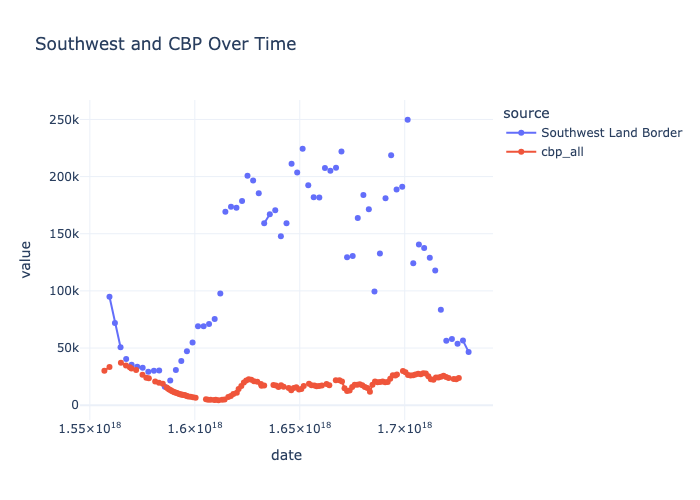

In [15]:
# Without this, it renders both colors as black!
px.defaults.template = "plotly_white"

# Subset to rows where detention data is available (it starts later than encounters data)
first_valid_date = df_all[df_all["cbp_all"].notna()]["date"].min()

# Subset to rows where encounters data is available (it ends earlier than detention data)
last_valid_date = df_all[df_all["Southwest Land Border"].notna()]["date"].max()

# Subset to shared date range and make a copy to avoid chained assignment issues
df_subset = df_all[df_all['date'].between(first_valid_date, last_valid_date, 'both')].copy()

df_melted = df_subset.melt(
    id_vars="date",
    value_vars=["Southwest Land Border", "cbp_all"],
    var_name="source",
    value_name="value",
)

px.line(
    df_melted,
    x="date",
    y="value",
    color="source",
    title="Southwest and CBP Over Time",
    markers=True,
)

While the Encounters data is monthly, the Detention dataset is irregular. This seems to cause plotly to not draw lines between all the points. Let's interpolate the data and try again.

## Interpolation

Our eventual goal is to graph the data. However, the join introduced NaNs, and plotly does not draw lines between points if there is a NaN in between. For example:

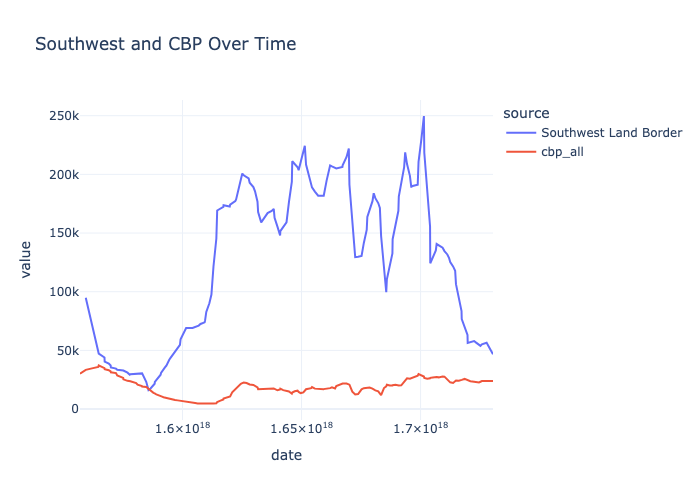

In [16]:
df_subset['Southwest Land Border'] = df_subset['Southwest Land Border'].interpolate()
df_subset['cbp_all'] = df_subset['cbp_all'].interpolate()

df_melted = df_subset.melt(
    id_vars="date",
    value_vars=["Southwest Land Border", "cbp_all"],
    var_name="source",
    value_name="value",
)

px.line(
    df_melted,
    x="date",
    y="value",
    color="source",
    title="Southwest and CBP Over Time",
 #   markers=True,
)

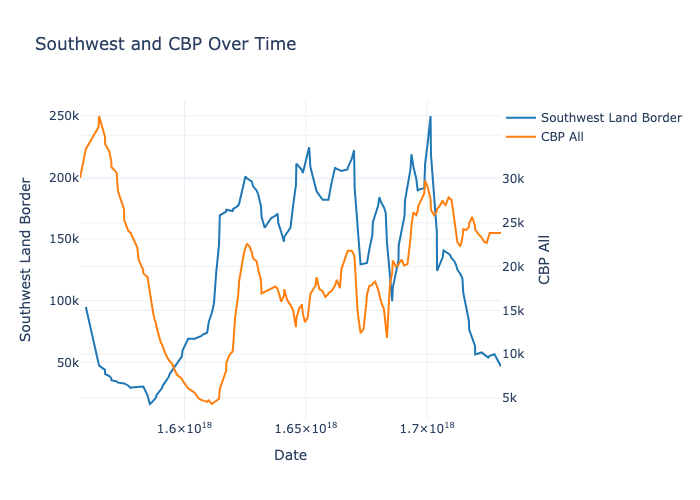

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# First trace: Southwest Land Border (left y-axis)
fig.add_trace(go.Scatter(
    x=df_subset["date"],
    y=df_subset["Southwest Land Border"],
    name="Southwest Land Border",
    yaxis="y1",
    line=dict(color="#1f77b4")
))

# Second trace: cbp_all (right y-axis)
fig.add_trace(go.Scatter(
    x=df_subset["date"],
    y=df_subset["cbp_all"],
    name="CBP All",
    yaxis="y2",
    line=dict(color="#ff7f0e")
))

# Layout with dual y-axes
fig.update_layout(
    title="Southwest and CBP Over Time",
    xaxis=dict(title="Date"),
    yaxis=dict(title="Southwest Land Border"),
    yaxis2=dict(
        title="CBP All",
        overlaying="y",
        side="right"
    ),
    legend=dict(x=1, y=0.99),
    template="plotly_white"
)

fig.show()


In [22]:
df_subset[["Southwest Land Border", "cbp_all"]].corr()


,Southwest Land Border,cbp_all
Southwest Land Border,1.000000,0.081134
cbp_all,0.081134,1.000000


In [29]:
for lag in range(0, 29):  # try lags from 0 to 28 days (i.e. 4 weeks)
    shifted = df_subset["Southwest Land Border"].shift(lag)
    corr = shifted.corr(df_subset["cbp_all"])
    print(f"Lag {lag}: correlation = {corr:.3f}")


Lag 0: correlation = 0.081
Lag 1: correlation = 0.125
Lag 2: correlation = 0.169
Lag 3: correlation = 0.215
Lag 4: correlation = 0.266
Lag 5: correlation = 0.317
Lag 6: correlation = 0.366
Lag 7: correlation = 0.413
Lag 8: correlation = 0.457
Lag 9: correlation = 0.495
Lag 10: correlation = 0.528
Lag 11: correlation = 0.552
Lag 12: correlation = 0.569
Lag 13: correlation = 0.581
Lag 14: correlation = 0.589
Lag 15: correlation = 0.598
Lag 16: correlation = 0.610
Lag 17: correlation = 0.624
Lag 18: correlation = 0.635
Lag 19: correlation = 0.642
Lag 20: correlation = 0.644
Lag 21: correlation = 0.644
Lag 22: correlation = 0.641
Lag 23: correlation = 0.638
Lag 24: correlation = 0.633
Lag 25: correlation = 0.629
Lag 26: correlation = 0.626
Lag 27: correlation = 0.628
Lag 28: correlation = 0.633


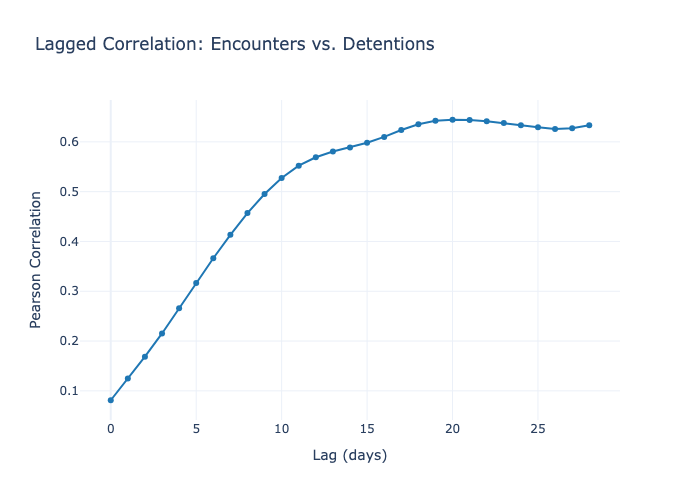

In [30]:
import plotly.graph_objects as go

lags = list(range(0, 29))  
correlations = [
    df_subset["Southwest Land Border"].shift(lag).corr(df_subset["cbp_all"])
    for lag in lags
]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=lags,
    y=correlations,
    mode="lines+markers",
    name="Lagged Correlation",
    line=dict(color="#1f77b4"),
    marker=dict(size=6)
))

fig.update_layout(
    title="Lagged Correlation: Encounters vs. Detentions",
    xaxis_title="Lag (days)",
    yaxis_title="Pearson Correlation",
    template="plotly_white",
    hovermode="x unified"
)

fig.show()
